<h1 class="heading"> Maneuver Test</h1>
<h1>Turn with autopilot as pilot simulator</h1>

<h6 class="author"> — <b style="color:rgb(0,51,102);">Carmine Varriale, Agostino De Marco</b>, <i>University of Naples Federico II</i></h6>

## Introduction and setup
The purpose of this Notebook is to illustrate how to use the autopilot in order to simulate human pilot behaviour during a simple turn, from steady and leveled flight conditions. This approach is quite an easy one in this case and therefore it may be considered as the default one when dealing with this kind of maneuver.<br><br>

Here's the modules and functions we are going to need

In [1]:
# Notebook Initialization
% run ./python/nb_init.py                        
% matplotlib inline                              

import plotting_routines as plrt
import data_handling as dh

HTML(open('./style/style_unina_iwes.css', 'r').read())

and here's the list of external files we are going to use throughout the Notebook.

In [2]:
# Directory for output
dest_folder='../output/mantest_turn0_ap/'

# Catalog to file
os.system('../JSBSim/JSBSim --root=../JSBSim/ --catalog=c172x_unina > ../JSBSim/catalog_c172x_unina.txt')

# Reference to script file
script_path='../JSBSim/scripts/c172x_mantest_turn0_ap.xml'

# Reference to initialization file
init_path = '../JSBSim/aircraft/c172x_unina/init_mantest_turn0_ap.xml'

## Script file analysis
After a simple trim in steady and leveled flight, let's take a look at the sequence of events that forces our autopilot  to behave the way we need it to.<br><br>

* <div class="typewr">Line 18</div>: we define a new property and initialize it to 1; it will be useful to print some time histories in the simulation log file.

* <div class="typewr">Line 53</div>: this event, called "Initialization 1" does nothing practical in the simulation. It only sets the values of the reference signals for the autopilot, BUT without switching it on. On <div class="typewr">Line 56</div>, the reference route is set to 90° (that is the same route the airplane is travelling on, the one set as the initial condition). This phase is necessary to easily define a heading reference that changes smoothly in time, as described in the following paragraph.

* <div class="typewr">Line 64</div>: here, the autopilot roll channel is actually set up and activated.
    - <div class="typewr">Line 67-69</div>: set up of heading channel PID controller gains. These may take a while to be figured out correctly, as they strongly depend on the type of maneuver and aircraft. Apart from trial and error, an easily implemented heuristic method is the <a href="https://en.wikipedia.org/wiki/Ziegler%E2%80%93Nichols_method">Ziegler–Nichols</a> one, although its results may need to be modified in light of desired systems' dynamic response properties (overshoot, decay time, steady error,...) and their trends with respect to proportional, intregral and derivative gains.
    - <div class="typewr">Line 70</div>: with this command, the autopilot is assigned a reference signal (<div class="typewr">ap/heading_setpoint</div>) that continuously increases in time, and precisely: its value ranges linearly (<div class="typewr">action="ramp"</div>) from the value it already has (<div class="typewr">type="delta"</div>, see the Initialization event) to a new value that is 45° greater, and it does so in a time span of 20 seconds (<div class="typewr">tc="20"</div>). What we are actually telling the autopilot, is to perform a smooth 45° turn right, in about 20 seconds.
    - <div class="typewr">Line 71</div>: only now, after gains and reference setup, the autopilot is actually switched on.

In [3]:
dh.show_file(script_path)

   1| <?xml version="1.0"?>
   2| <?xml-stylesheet type="text/xsl" 
   3| 	href="http://jsbsim.sourceforge.net/JSBSimScript.xsl"?>
   4| 
   5| 
   6| <runscript xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
   7| 		xsi:noNamespaceSchemaLocation="http://jsbsim.sf.net/JSBSimScript.xsd"
   8| 		name="Script for C172x - Turn with autopilot ">
   9| 
  10| 
  11|     <!--
  12| 		C172x performing a turn with autopilot as a pilot-simulator
  13|     -->
  14| 
  15|     <use aircraft="c172x_unina" initialize="init_mantest_turn0_ap" />
  16|     <run start="0.0" end="80" dt="0.0083333"> 
  17| 
  18|         <property value="1">simulation/notify-time-trigger</property>
  19| 
  20|         <!--
  21| 		For "do_simple_trim" (Classic trim):
  22| 		0: Longitudinal
  23| 		1: Full
  24| 		2: Ground
  25| 		3: Pullup
  26| 		4: Custom
  27| 		5: Turn
  28| 		6: None
  29| 		-->
  30| 
  31|         <event name="Trim">
  32|             <description>Trim the aircraft in the initial condit

## Simulation launch

Here's the Code Block that proves the most useful when trying to correctly simulate an assigned maneuver. It contains alla commands from JSBSim script launch to time histories plots, and it only requires one run to do it all. Plots for the trajectory have been separated for calculation speed, and require a separate run.

In [4]:
# JSBSim script launch command
os.system('../JSBSim/JSBSim --root=../JSBSim/ --script='+script_path+' > ../JSBSim/log_turn0_ap.txt')

0

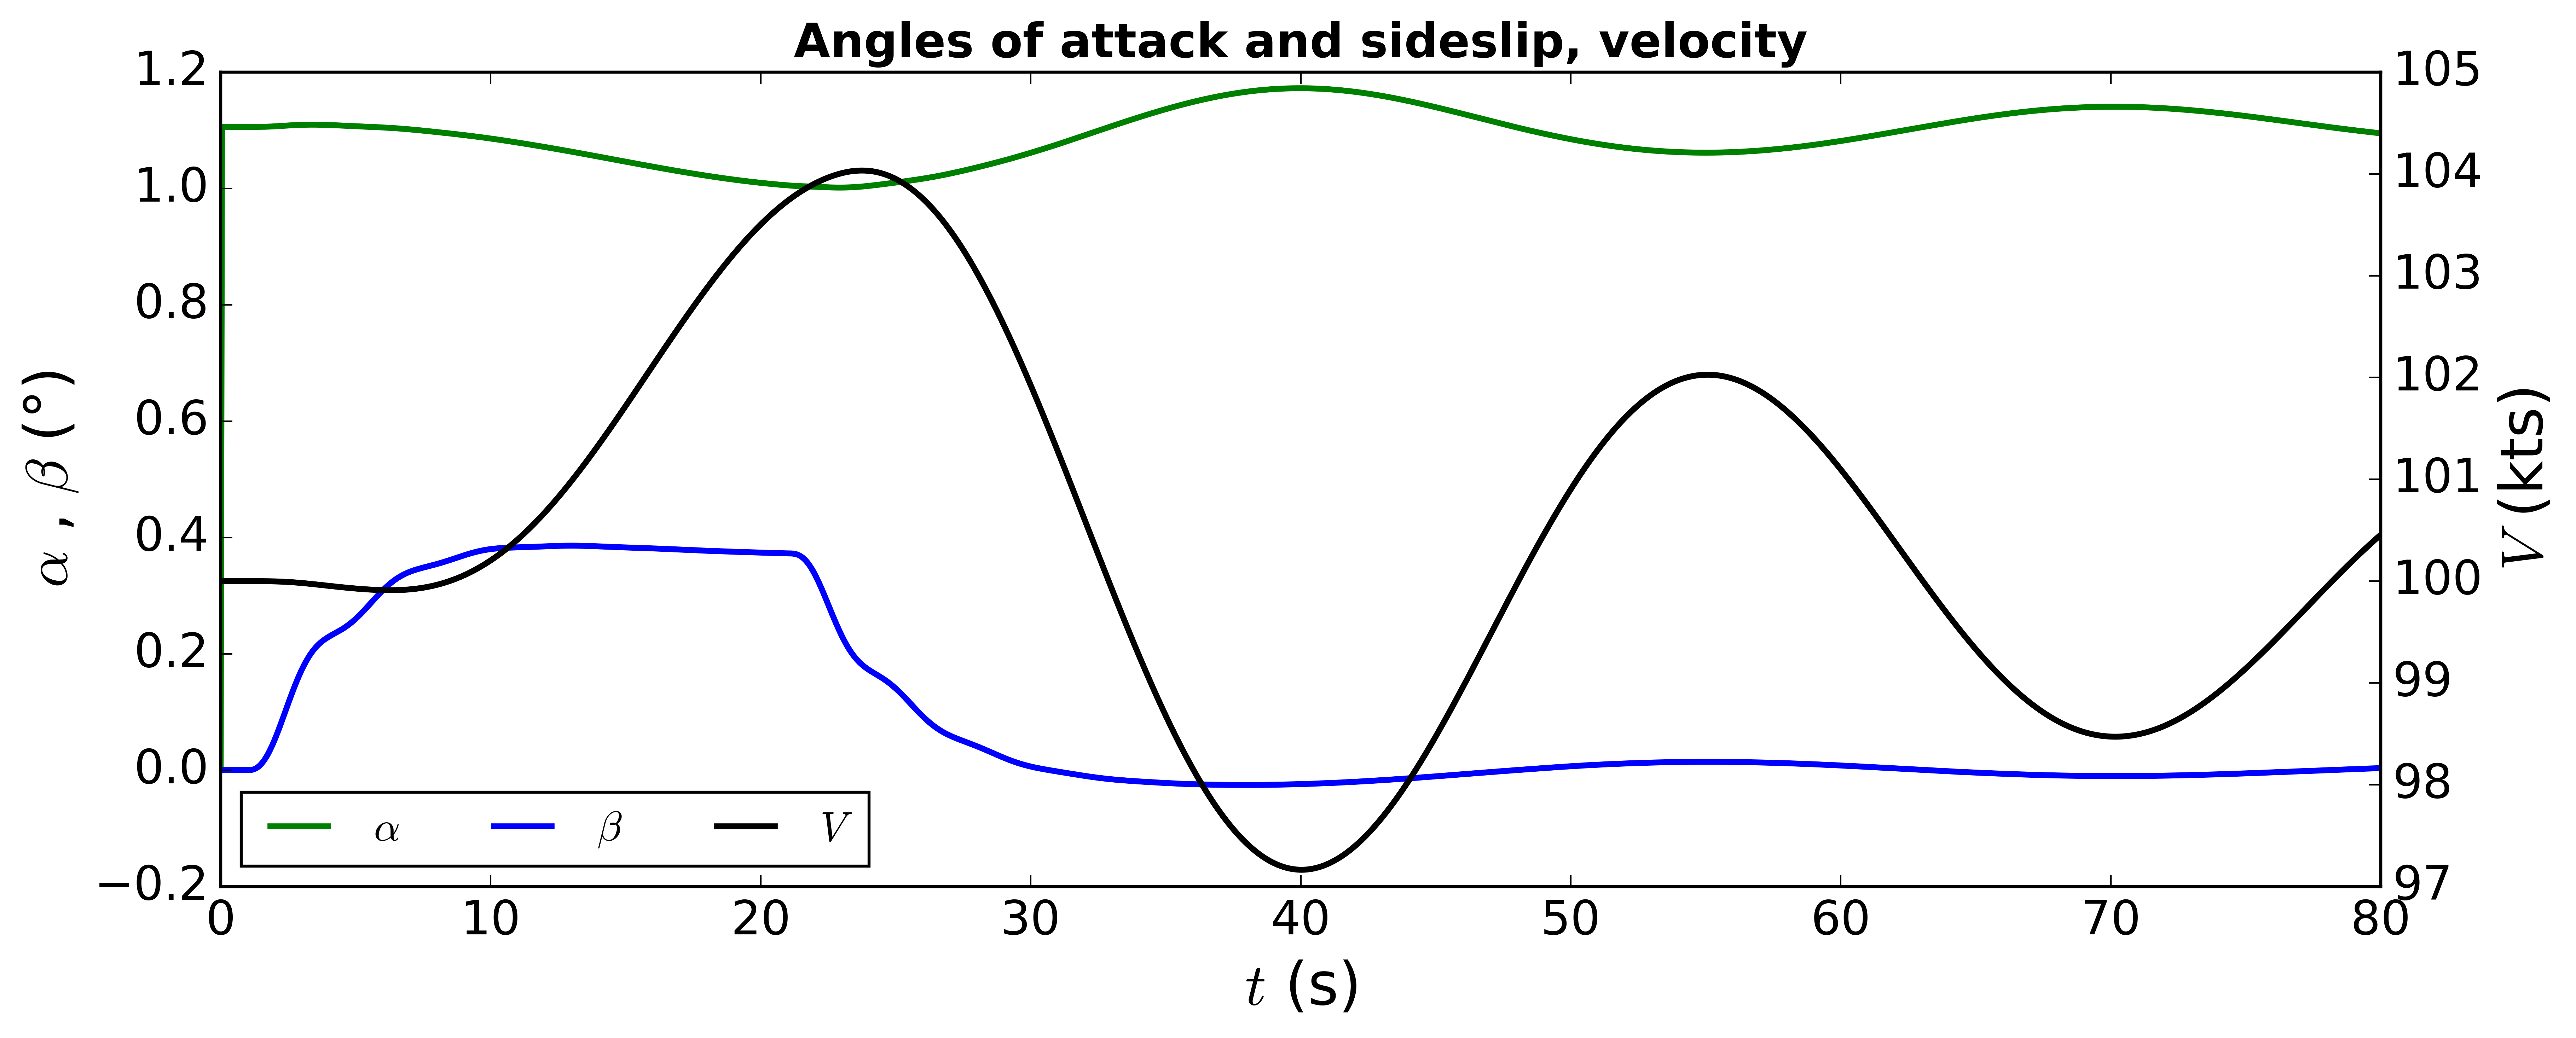

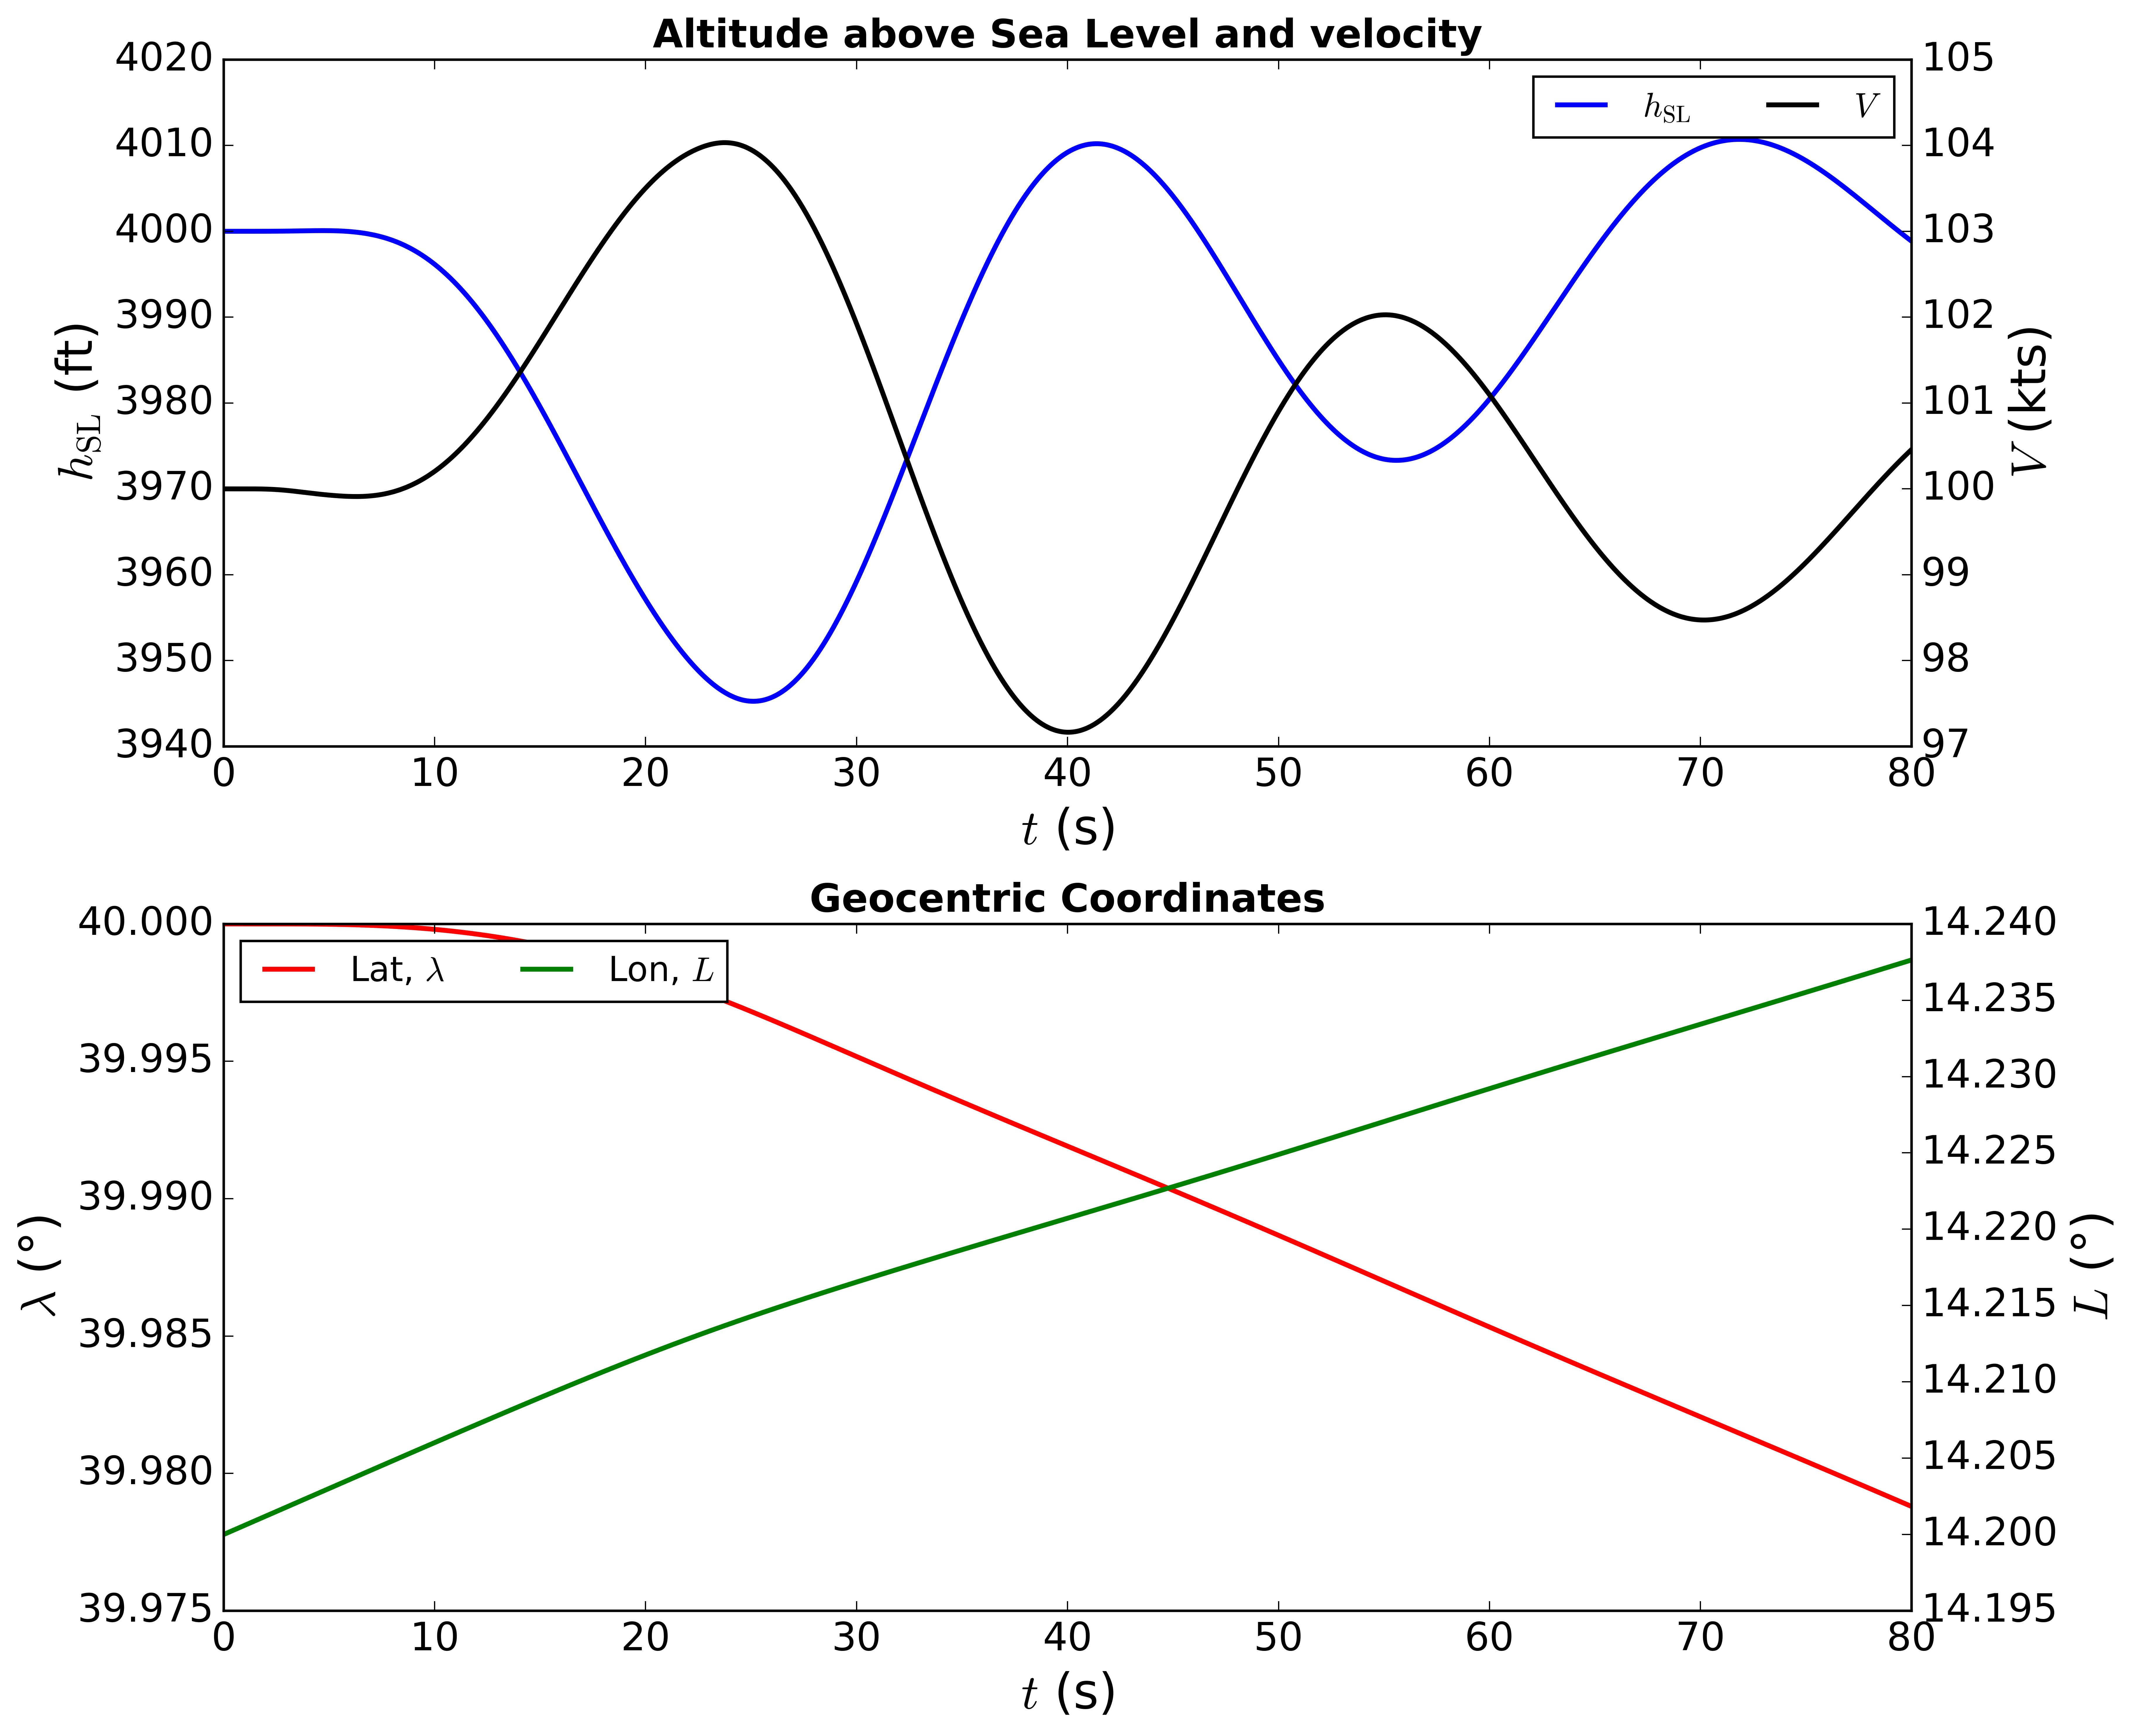

In [5]:
dh.move_files_to_folder('*.csv',dest_folder,'../JSBSim/')
dh.move_files_to_folder('*.txt',dest_folder,'../JSBSim/')

# Data extraction from JSBSim custom output files
data_fcs = np.genfromtxt(dest_folder+'C172x_unina_fcs.csv',       delimiter=',', skip_header=1)
data_vel = np.genfromtxt(dest_folder+'C172x_unina_velocities.csv',delimiter=',', skip_header=1)
data_att = np.genfromtxt(dest_folder+'C172x_unina_attitude.csv',  delimiter=',', skip_header=1)
data_aer = np.genfromtxt(dest_folder+'C172x_unina_aero.csv',      delimiter=',', skip_header=1)
data_pos = np.genfromtxt(dest_folder+'C172x_unina_position.csv',  delimiter=',', skip_header=1)
data_eng = np.genfromtxt(dest_folder+'C172x_unina_propulsion.csv',delimiter=',', skip_header=1)

# Time histories
plrt.plot_Cmd_AngVel_EulerAng(data_fcs, data_vel, data_att, dest_folder)
plrt.plot_Alfa_Beta_V(data_aer, data_vel, dest_folder)
plrt.plot_PosGeoc(data_pos, data_vel, dest_folder)
#plrt.plot_EngineStatus(data_eng, data_vel, dest_folder)

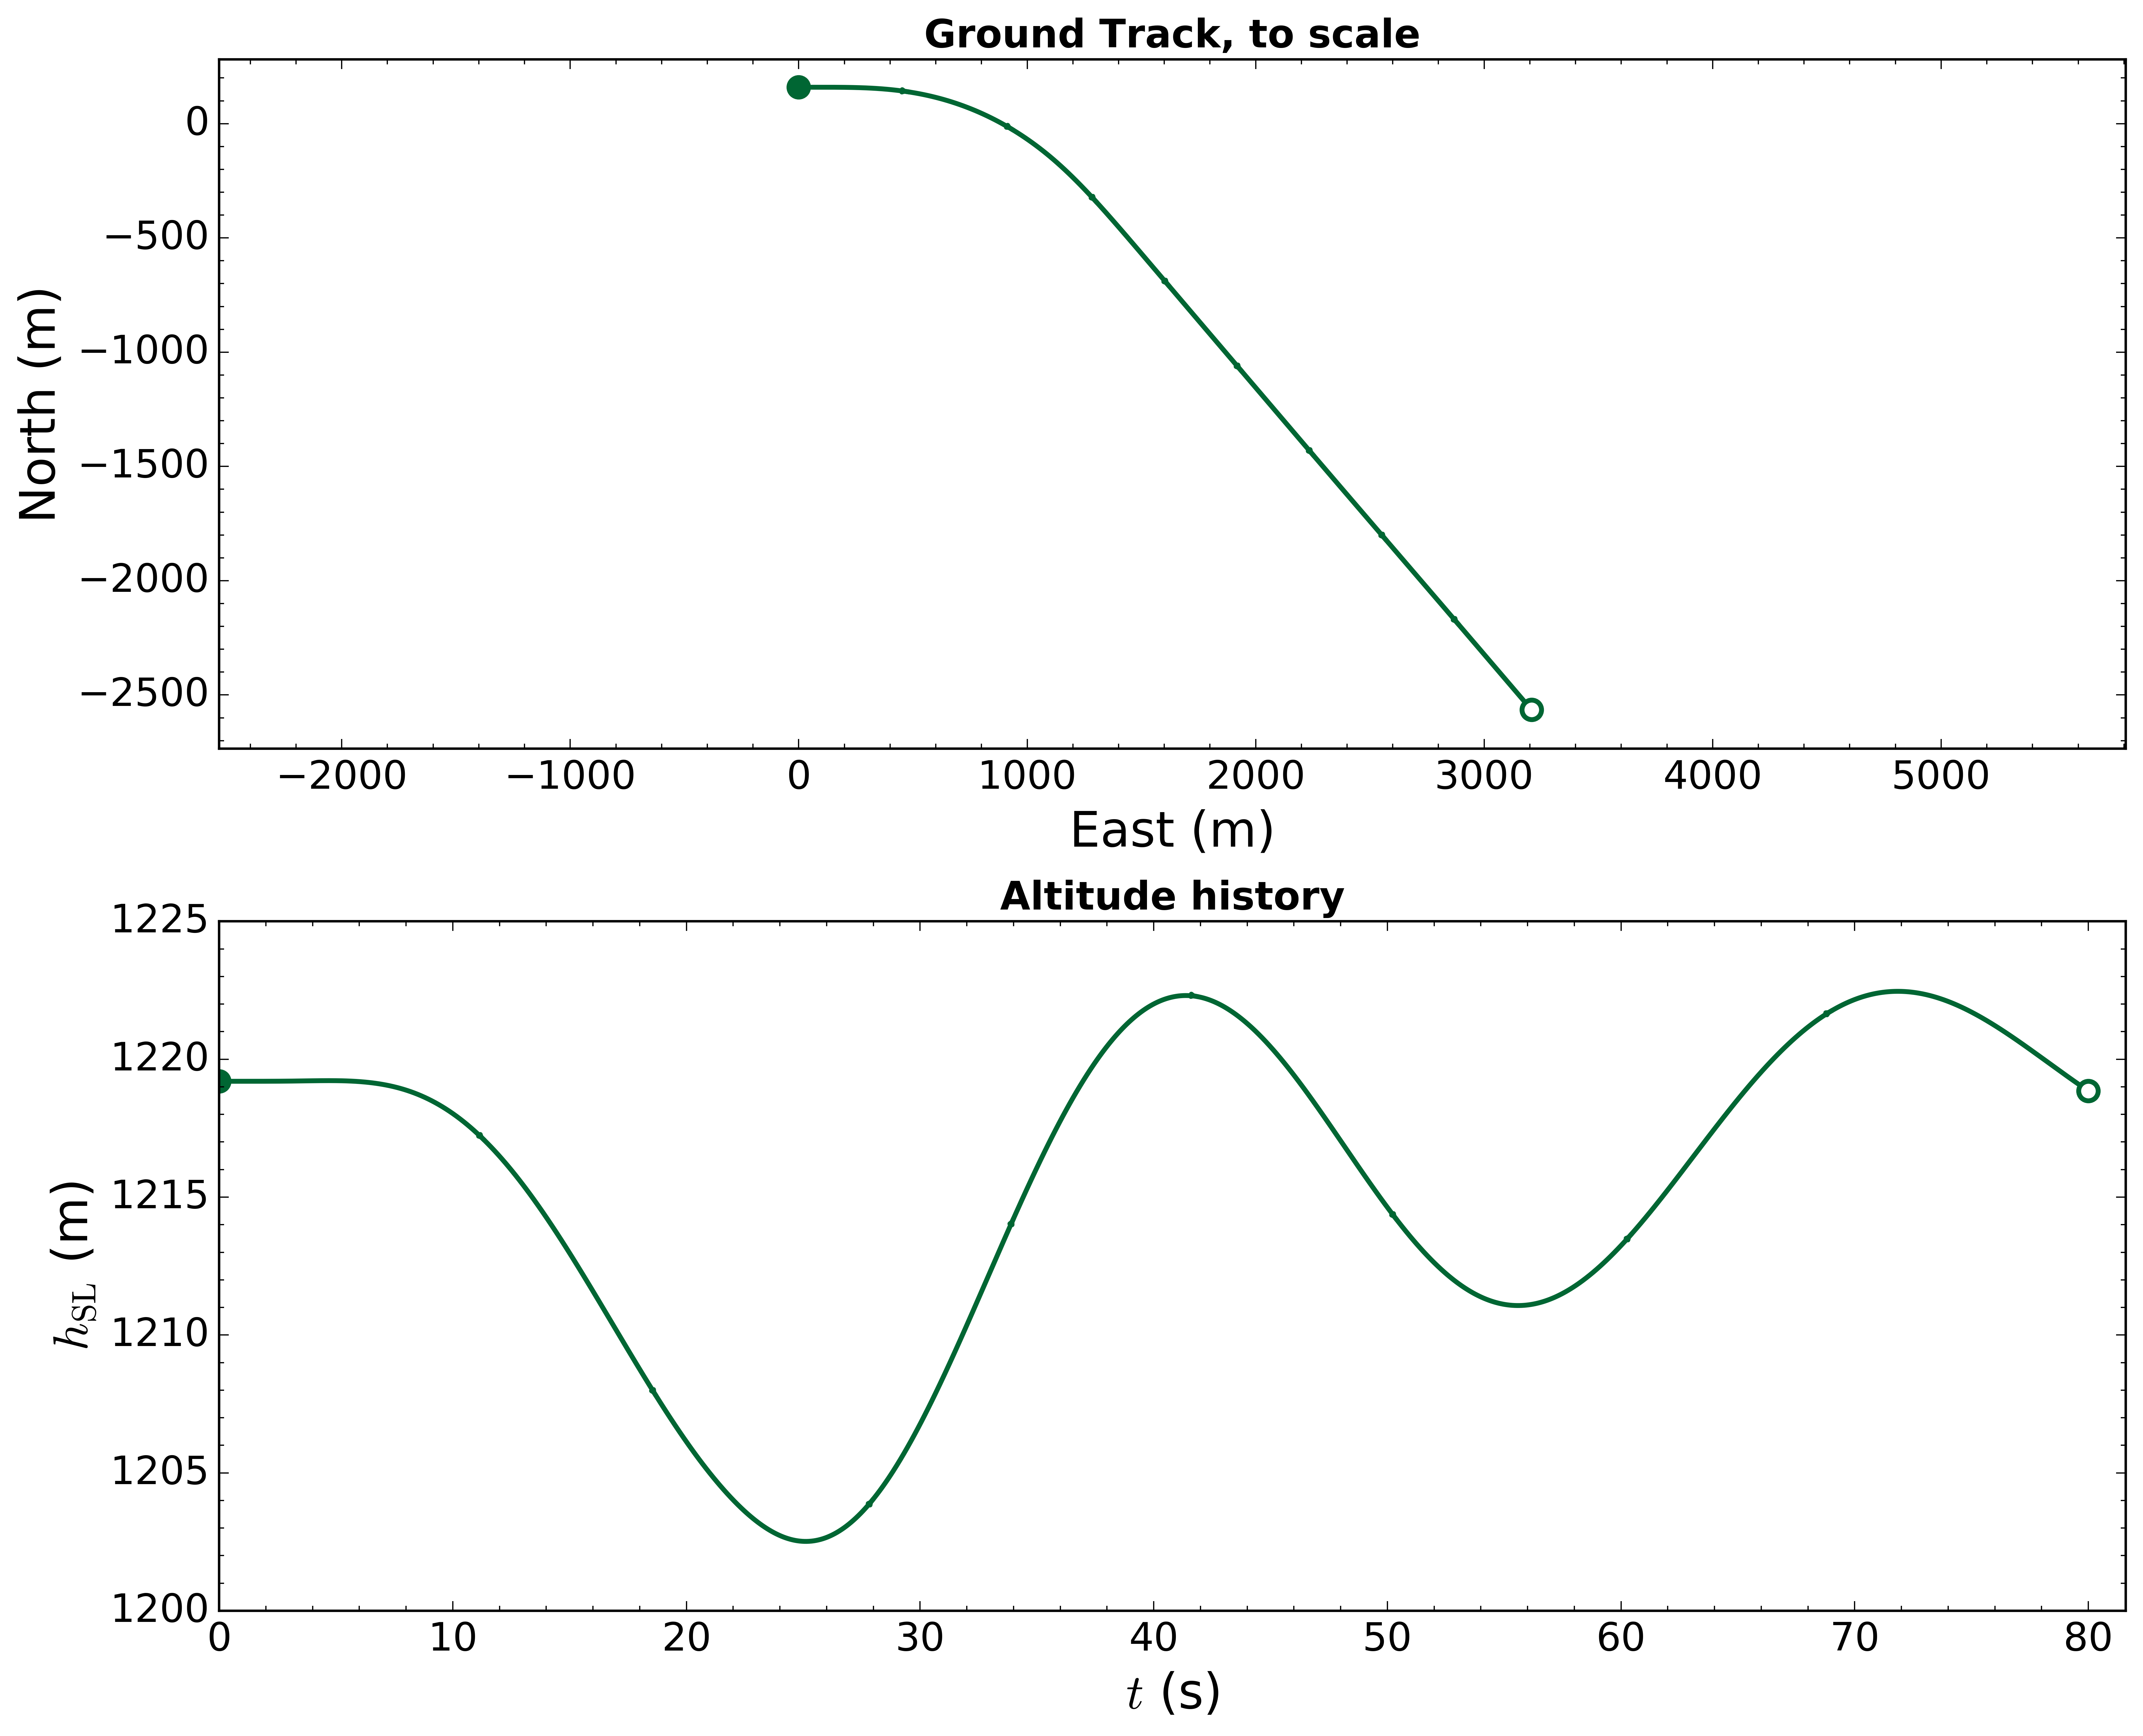

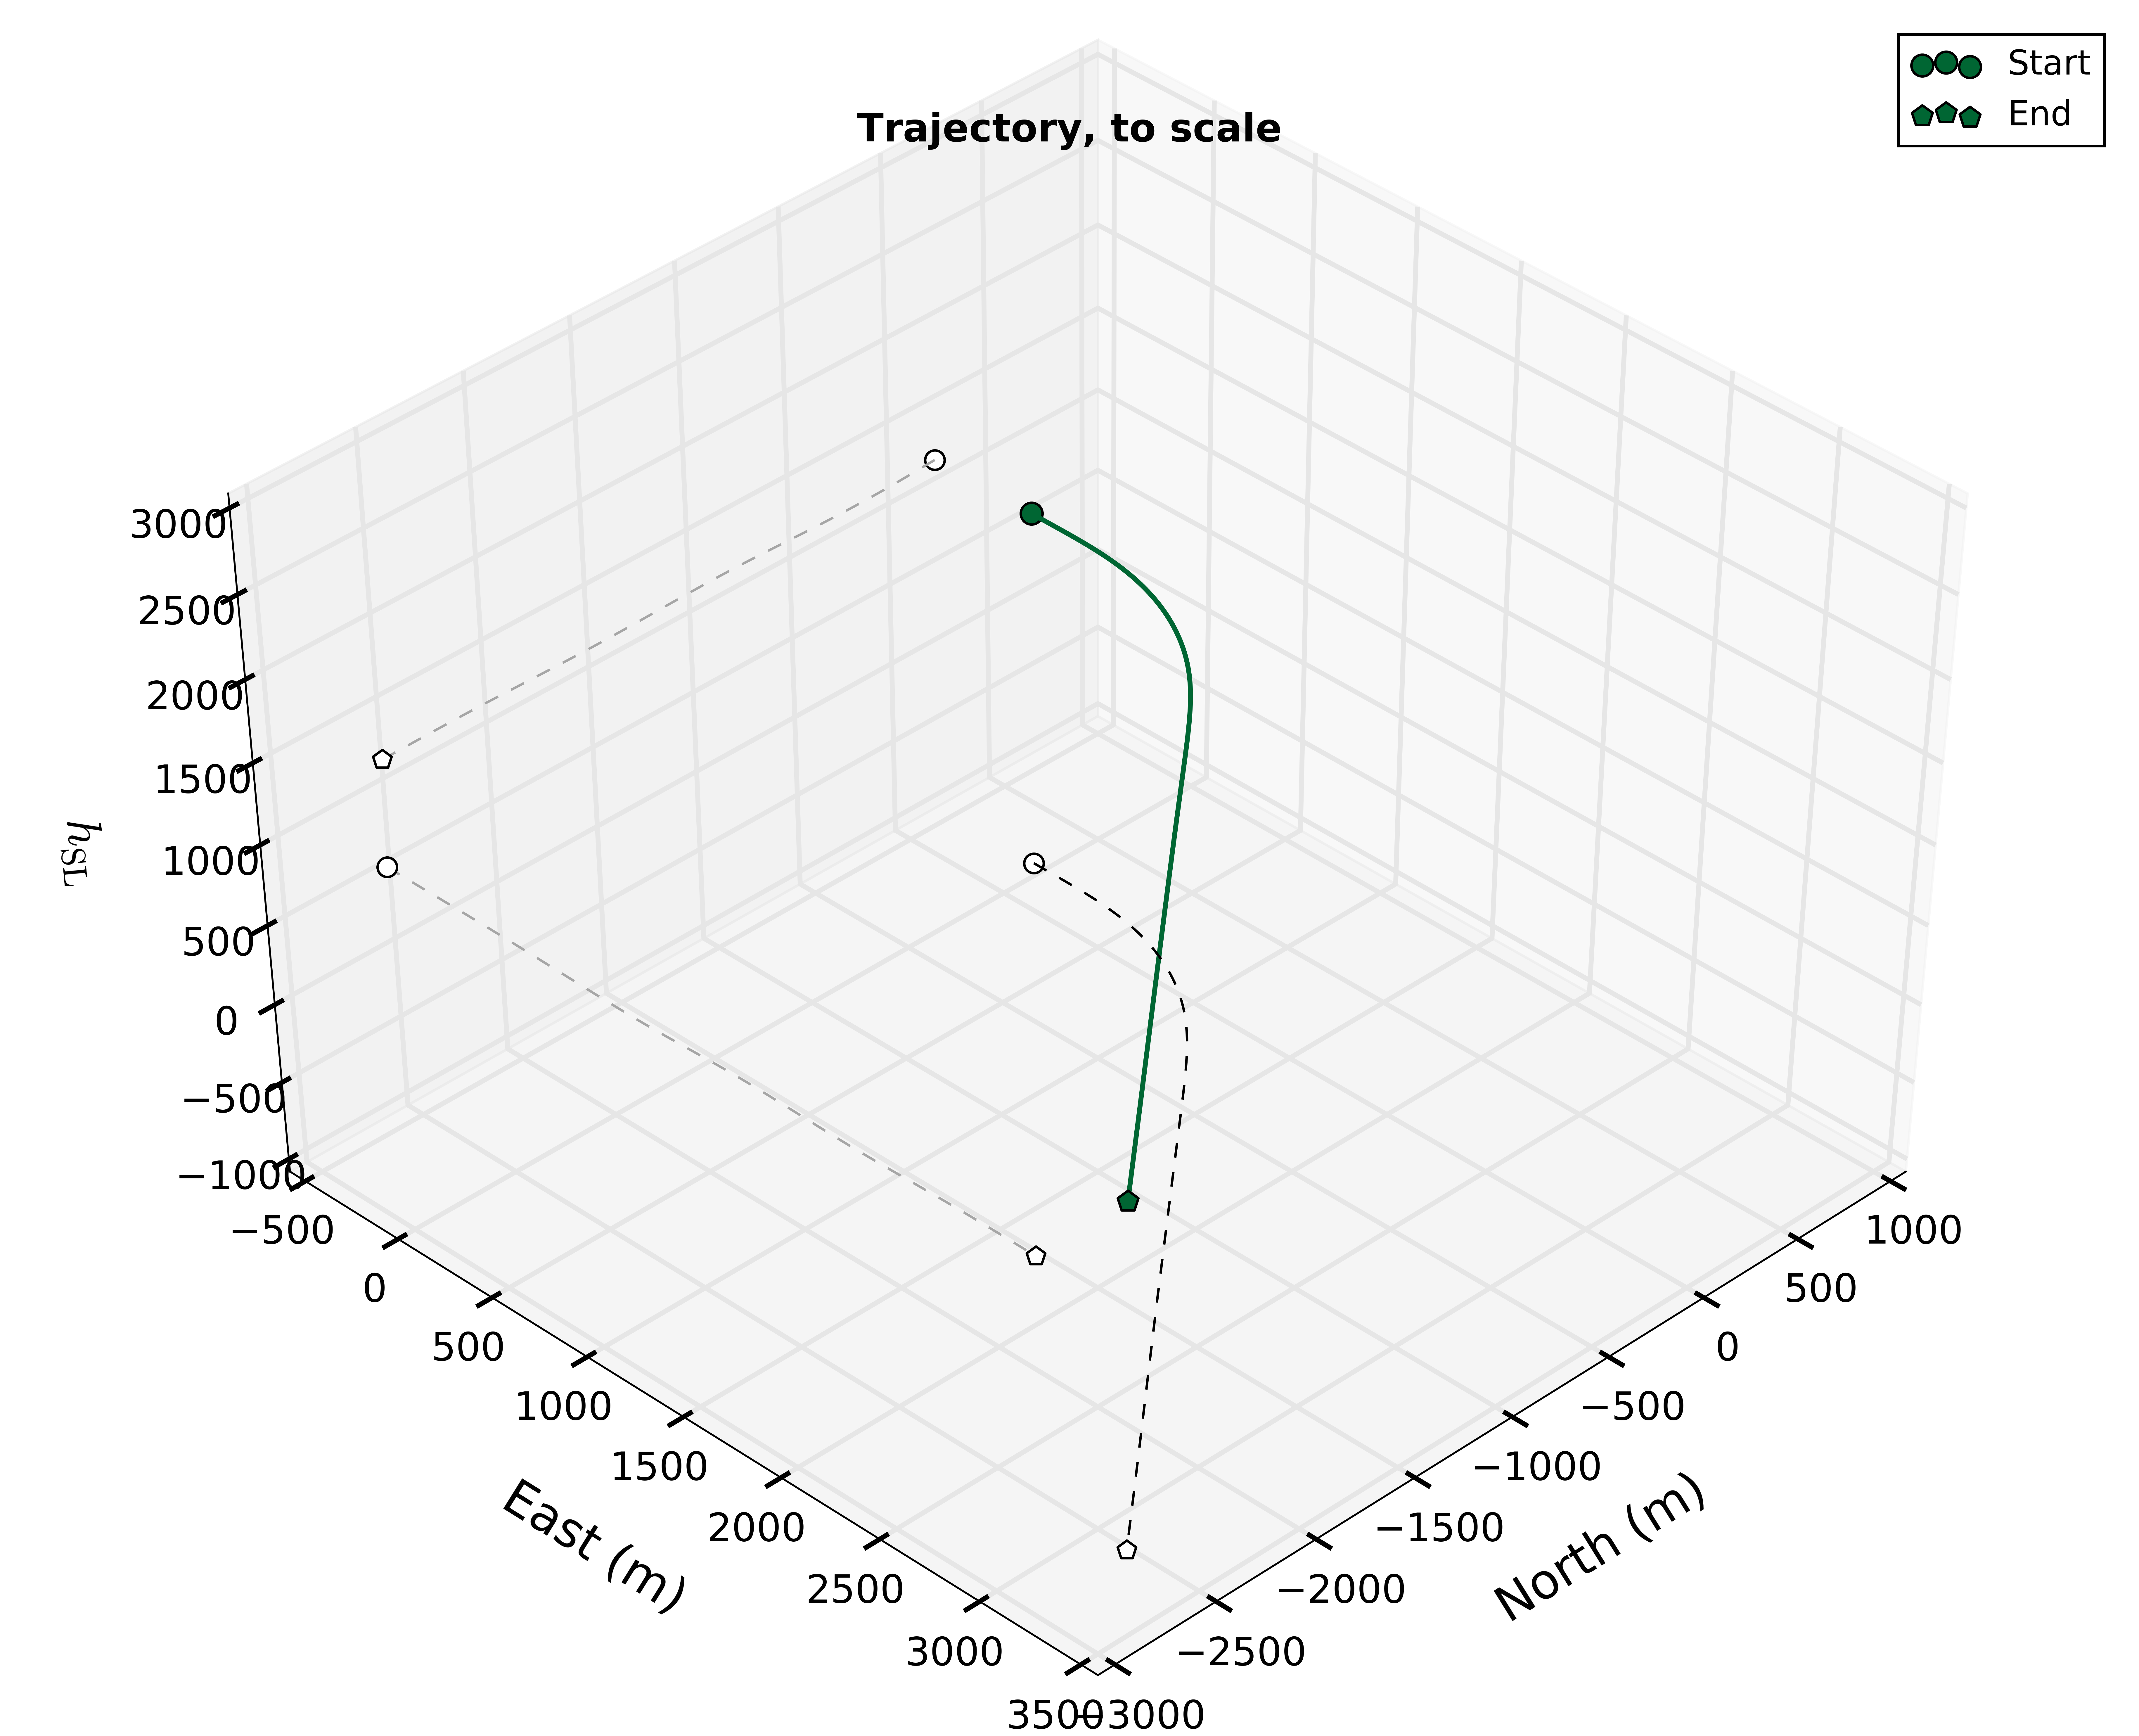

In [6]:
# Plotting in NEA reference frame
import geography as geo

t_pos     = (data_pos[:,0]*unit.s).magnitude
h_sl      = ((data_pos[:,1]*unit.ft).to(unit.m)).magnitude
lat_deg   = (data_pos[:,7]*unit.deg).magnitude
lon_deg   = (data_pos[:,9]*unit.deg).magnitude
lat_rad   = ((lat_deg*unit.deg).to(unit.rad)).magnitude
lon_rad   = ((lon_deg*unit.deg).to(unit.rad)).magnitude

r = geo.geoc_to_NEA(lat_rad,lon_rad,h_sl,flat=1)

plrt.plot_traj2D_NEA(r,t_pos,n_arrows=8,arrow_size=2, dest_folder=dest_folder)
plrt.plot_traj3D_NEA(r,'S','W',view=(45,45),to_scale='XYZ',mrk_size=80,dest_folder=dest_folder)